In [2]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# df = pd.read_pickle("../comparison/results_s_curve_20_5.pkl")
# df2 = pd.read_pickle("../comparison/results_s_curve_20_5_2.pkl")
# df = pd.concat([df, df2])
# df = df.reset_index(drop=True)
# df.to_pickle("../comparison/results_s_curve_20_5_0.0.1.pkl")

In [4]:
df = pd.read_pickle("../comparison/results_tree_100_3_0.0.2.pkl")

df = df[~df.Method.isin(["TreeEMD", "Mean"])]

# df = pd.read_pickle("../comparison/results_tree_100_3_0.0.2.pkl")

df2 = pd.read_pickle("../comparison/results_tree_100_3_0.0.3.pkl")
df_large = pd.read_pickle("../comparison/results_tree_100_3_0.1.2.pkl")
df_larger = pd.read_pickle("../comparison/results_tree_100_3_0.1.3.pkl")
df_demd = pd.read_pickle("../comparison/results_tree_100_3_0.1.4.pkl")
df_demd2 = pd.read_pickle("../comparison/results_tree_100_3_0.1.5.pkl")
df = pd.concat([df, df2, df_large, df_larger, df_demd, df_demd2])
df = df.reset_index()

In [10]:
df["Method"] = df["Method"].replace(
    ["TreeEMD", "Exact", "Sinkhorn"], ["Trellis", "Exact EMD", "Sinkhorn EMD"]
)

In [11]:
df_mean = df.groupby(["Method", "# distributions"]).mean()

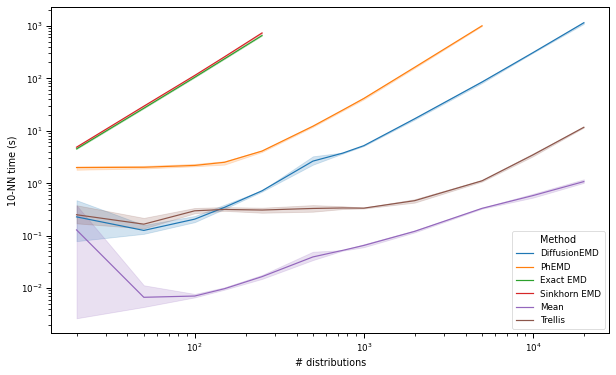

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(data=df, x="# distributions", y="10-NN time (s)", hue="Method")
plt.xscale("log")
plt.yscale("log")

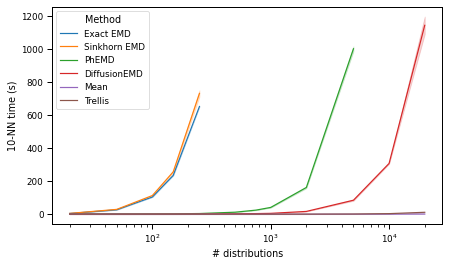

In [23]:
sns.set_context("paper")
order = ["Exact EMD", "Sinkhorn EMD", "PhEMD", "DiffusionEMD", "Mean", "Trellis"]
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
sns.lineplot(
    data=df,
    x="# distributions",
    y="10-NN time (s)",
    hue="Method",
    ci="sd",
    hue_order=order,
)
# plt.ylim(0, 600)
plt.xscale("log")
# plt.yscale("log")
plt.savefig("Time_Comparison_v1.png", dpi=300)

In [20]:
df_m = df[~(df.Method == "Mean")]

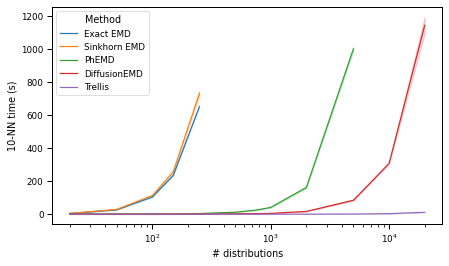

In [22]:
sns.set_context("paper")
order = ["Exact EMD", "Sinkhorn EMD", "PhEMD", "DiffusionEMD", "Trellis"]
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
sns.lineplot(
    data=df_m,
    x="# distributions",
    y="10-NN time (s)",
    hue="Method",
    ci="sd",
    hue_order=order,
)
# plt.ylim(0, 600)
plt.xscale("log")
# plt.yscale("log")
plt.savefig("Time_Comparison_v2.png", dpi=300)

In [29]:
df.to_csv("Timing_results.csv")

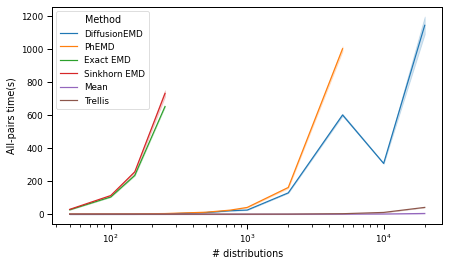

In [14]:
sns.set_context("paper")
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
sns.lineplot(data=df, x="# distributions", y="All-pairs time(s)", hue="Method", ci="sd")
# plt.ylim(0, 600)
plt.xscale("log")
# plt.yscale("log")
plt.savefig("Time_Comparison_v1.png", dpi=300)

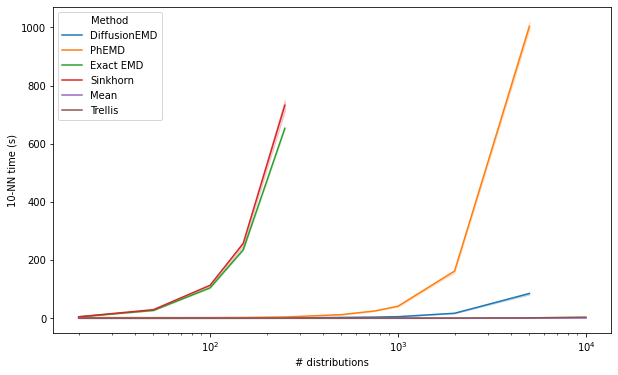

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(data=df, x="# distributions", y="10-NN time (s)", hue="Method")
plt.xscale("log")
# plt.yscale("log")

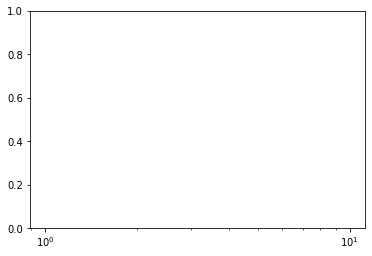

In [50]:
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df[df["# distributions"] == 200],
    x="10-NN time (s)",
    y="SpearmanR",
    hue="Method",
)
plt.xscale("log")

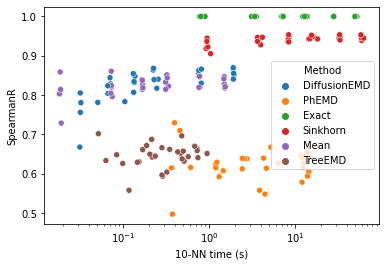

In [43]:
df = pd.read_pickle("../comparison/results_s_curve_20_5_0.0.1.pkl")
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df,
    x="10-NN time (s)",
    y="SpearmanR",
    hue="Method",
)
plt.xscale("log")

In [30]:
# Best fit line
def plot_pareto_frontier(Xs, Ys, maxX=True, maxY=True):
    """Pareto frontier selection process"""
    sorted_list = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxY)
    pareto_front = [sorted_list[0]]
    for pair in sorted_list[1:]:
        if maxY:
            if pair[1] >= pareto_front[-1][1]:
                pareto_front.append(pair)
        else:
            if pair[1] <= pareto_front[-1][1]:
                pareto_front.append(pair)

    """Plotting process"""
    plt.scatter(Xs, Ys)
    pf_X = [pair[0] for pair in pareto_front]
    pf_Y = [pair[1] for pair in pareto_front]
    plt.plot(pf_X, pf_Y)
    plt.xlabel("Objective 1")
    plt.ylabel("Objective 2")
    plt.show()

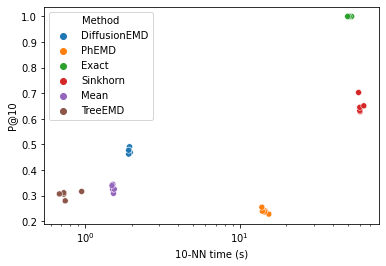

In [31]:
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df[df["# distributions"] == 200],
    x="10-NN time (s)",
    y="P@10",
    hue="Method",
)
plt.xscale("log")

In [46]:
df = pd.read_pickle(
    "../comparison/results_tree_20_10_[2, 3, 4, 5, 6, 7, 8]_[2, 3, 4, 5, 6, 7, 8]_[1, 4, 8, 16, 32, 64]_['kmeans']_0.0.3.pkl"
)

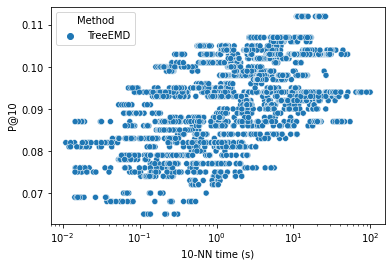

In [47]:
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df,
    x="10-NN time (s)",
    y="P@10",
    hue="Method",
)
plt.xscale("log")

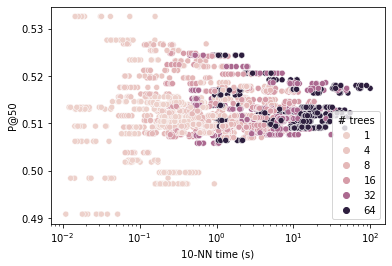

In [49]:
sns.scatterplot(
    data=df,
    x="10-NN time (s)",
    y="P@50",
    hue="# trees",
)
plt.xscale("log")

In [32]:
df = pd.read_pickle(
    "../comparison/results_swiss_roll_20_10_[2, 3, 4, 5, 6, 7, 8]_[2, 3, 4, 5, 6, 7, 8]_[1, 4, 8, 16, 32, 64]_['kmeans']_0.0.3.pkl"
)

In [33]:
df

,Method,Seed,# distributions,# Neighbors,# Clusters,# levels,# trees,Clustering Method,SpearmanR,P@1,P@5,P@10,P@25,P@50,10-NN time (s),All-pairs time(s)
0,TreeEMD,0,100,10,2,2,1,kmeans,0.482549,0.03,0.156,0.257,0.4568,0.6726,0.057451,0.057667
1,TreeEMD,0,100,10,2,2,4,kmeans,0.775799,0.21,0.458,0.548,0.6656,0.7986,0.094139,0.094247
2,TreeEMD,0,100,10,2,2,8,kmeans,0.878301,0.48,0.702,0.761,0.7880,0.8388,0.210638,0.210760
3,TreeEMD,0,100,10,2,2,16,kmeans,0.884667,0.50,0.718,0.771,0.8016,0.8462,0.354654,0.354867
4,TreeEMD,0,100,10,2,2,32,kmeans,0.889898,0.52,0.744,0.765,0.8232,0.8512,0.701762,0.702149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,TreeEMD,9,100,10,8,8,4,kmeans,0.028147,0.01,0.038,0.096,0.2484,0.5060,0.990049,0.993850
2936,TreeEMD,9,100,10,8,8,8,kmeans,0.022737,0.02,0.040,0.103,0.2456,0.5004,1.855016,1.862472
2937,TreeEMD,9,100,10,8,8,16,kmeans,0.022110,0.02,0.044,0.101,0.2428,0.5038,3.739938,3.755068
2938,TreeEMD,9,100,10,8,8,32,kmeans,0.021327,0.02,0.042,0.096,0.2456,0.5040,7.926397,7.957116


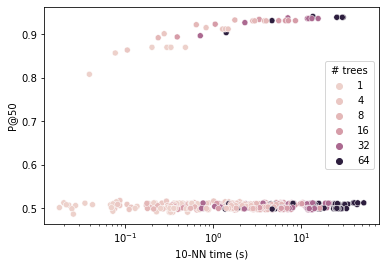

In [41]:
sns.scatterplot(
    data=df[df["# Clusters"] == 4],
    x="10-NN time (s)",
    y="P@50",
    hue="# trees",
)
plt.xscale("log")
# plt.yscale("log")

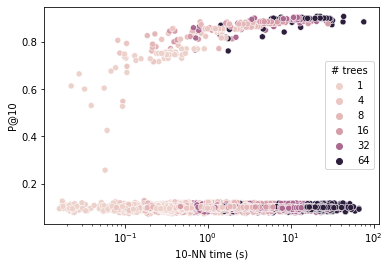

In [11]:
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df,
    x="10-NN time (s)",
    y="P@10",
    hue="# trees",
)
plt.xscale("log")

<AxesSubplot:xlabel='# trees', ylabel='P@10'>

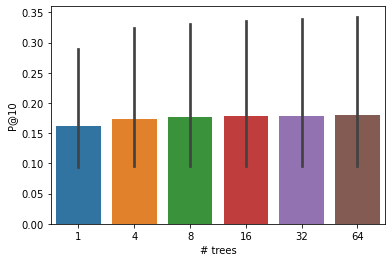

In [12]:
sns.barplot(
    data=df[(df["# Clusters"] == 4) & (df["# levels"] == 4)],
    x="# trees",
    y="P@10",
)

<AxesSubplot:xlabel='# Clusters', ylabel='P@10'>

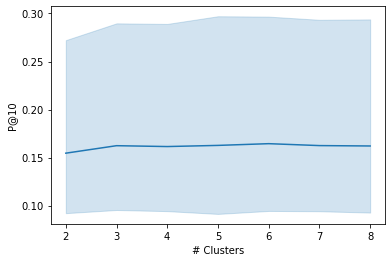

In [14]:
sns.lineplot(
    data=df[(df["# trees"] == 1) & (df["# levels"] == 4)],
    x="# Clusters",
    y="P@10",
)

<AxesSubplot:xlabel='# levels', ylabel='SpearmanR'>

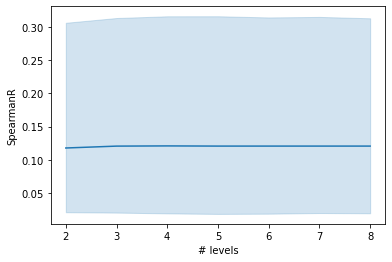

In [19]:
sns.lineplot(
    data=df[(df["# trees"] == 64) & (df["# Clusters"] == 4)],
    x="# levels",
    y="SpearmanR",
)

In [16]:
df.sort_values("SpearmanR")

,Method,Seed,# distributions,# Neighbors,# Clusters,# levels,# trees,Clustering Method,SpearmanR,P@1,P@5,P@10,P@25,P@50,10-NN time (s),All-pairs time(s)
2430,TreeEMD,8,100,10,3,8,1,kmeans,-0.022008,0.02,0.050,0.096,0.2360,0.4910,0.442648,0.443241
2424,TreeEMD,8,100,10,3,7,1,kmeans,-0.022008,0.02,0.050,0.096,0.2360,0.4910,0.463199,0.463773
2418,TreeEMD,8,100,10,3,6,1,kmeans,-0.022008,0.02,0.050,0.096,0.2360,0.4910,0.458141,0.458767
2412,TreeEMD,8,100,10,3,5,1,kmeans,-0.020732,0.02,0.056,0.097,0.2388,0.4928,0.405219,0.405673
1806,TreeEMD,6,100,10,3,2,1,kmeans,-0.017072,0.01,0.048,0.119,0.2408,0.4882,0.030164,0.030239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,TreeEMD,0,100,10,5,5,64,kmeans,0.984141,0.77,0.870,0.907,0.9356,0.9520,22.417331,22.466797
161,TreeEMD,0,100,10,5,7,64,kmeans,0.984141,0.77,0.870,0.907,0.9356,0.9520,20.773370,20.823341
155,TreeEMD,0,100,10,5,6,64,kmeans,0.984141,0.77,0.870,0.907,0.9356,0.9520,20.780615,20.830655
167,TreeEMD,0,100,10,5,8,64,kmeans,0.984141,0.77,0.870,0.907,0.9356,0.9520,22.671101,22.720970
